Starting with importing all packages needed for this notebook.

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import plotting_extent
import geopandas as gpd
import pyproj
file_dir = ('/Users/maddie/Projects/fishpredict/data/')
file_dir2 = ('/Users/maddie/Projects/fishpredict')


Now, the list created earlier is read and checked to make sure they all made it through the first pass with no errors.

In [3]:
taxa=pd.read_csv(file_dir + '/modified_data/gbif_filtered/taxa_list.txt',header=None)
taxa.columns=["taxon"]
species_occ_dict={}

print(taxa)

for i in taxa['taxon']:
    taxon_data = pd.read_csv(file_dir+'/modified_data/gbif_filtered/%s_filtered_data.csv'%i, low_memory=False)
    species_occ_dict['%s'%i] = taxon_data

if len(species_occ_dict.keys())==len(taxa["taxon"]):
    print("All species dataframes now in dictionary")
else:
    print("Error: not all species dataframe included")

                       taxon
0     Citharichthys_sordidus
1           Engraulis_mordax
2  Paralichthys_californicus
3          Scomber_japonicus
4           Thunnus_alalunga
5            Xiphias_gladius
All species dataframes now in dictionary


The geographical points are then plotted onto a map to reflect where all presence samples were found. These images can be found in the results foler, sorted by species.

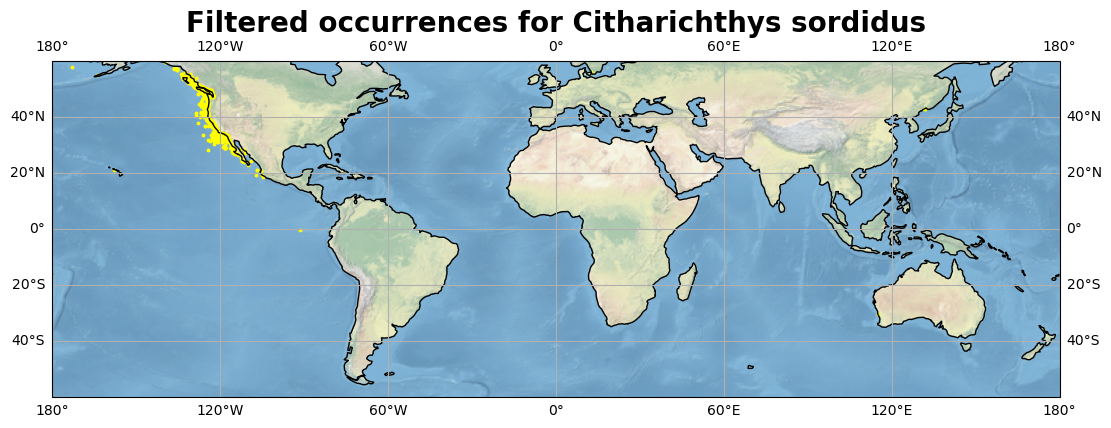

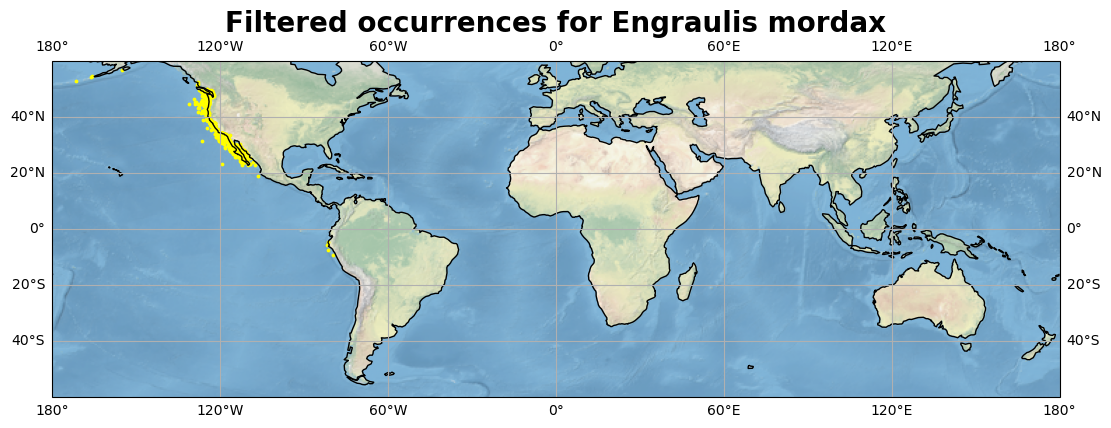

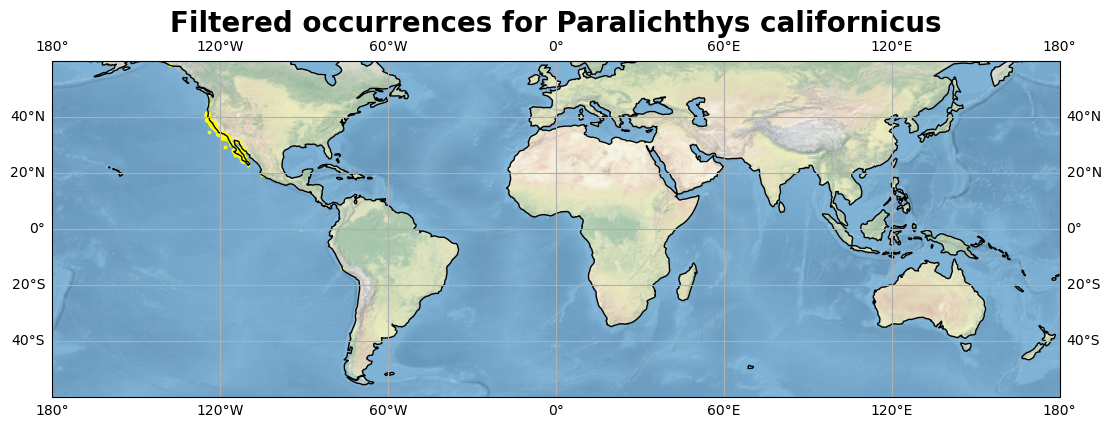

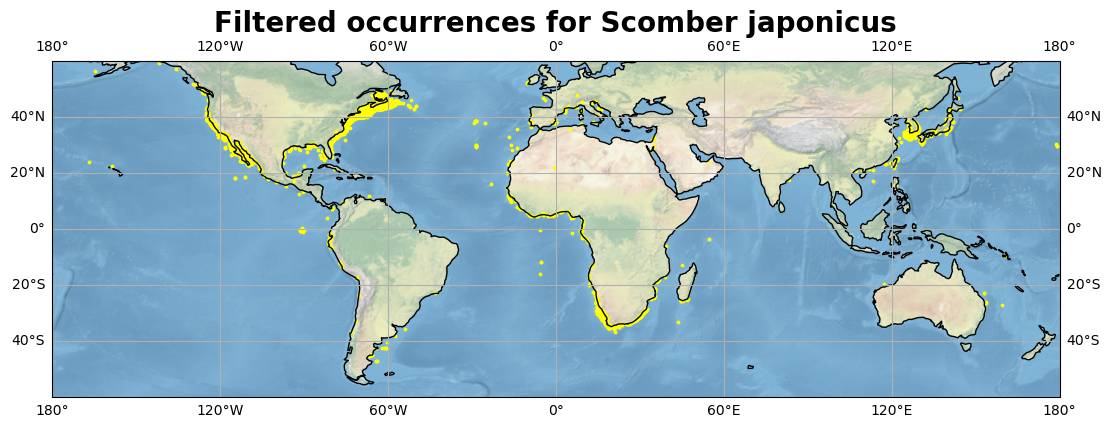

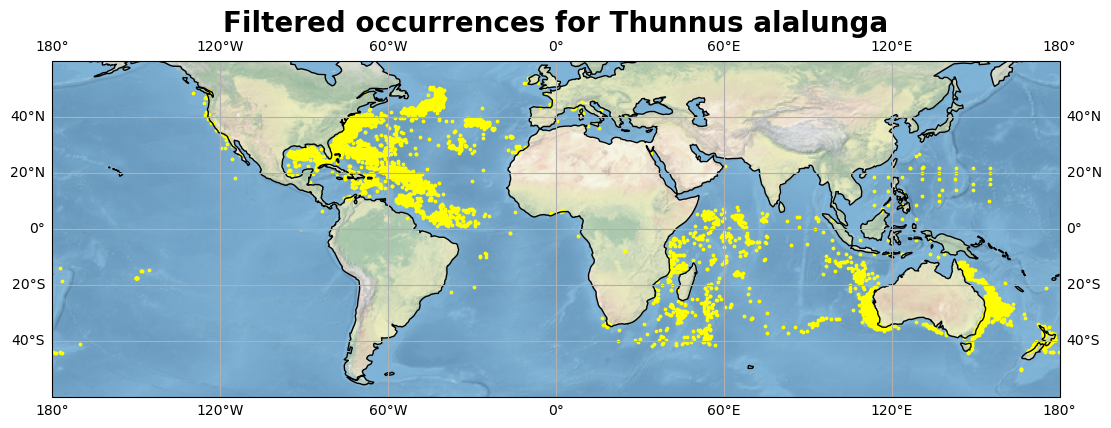

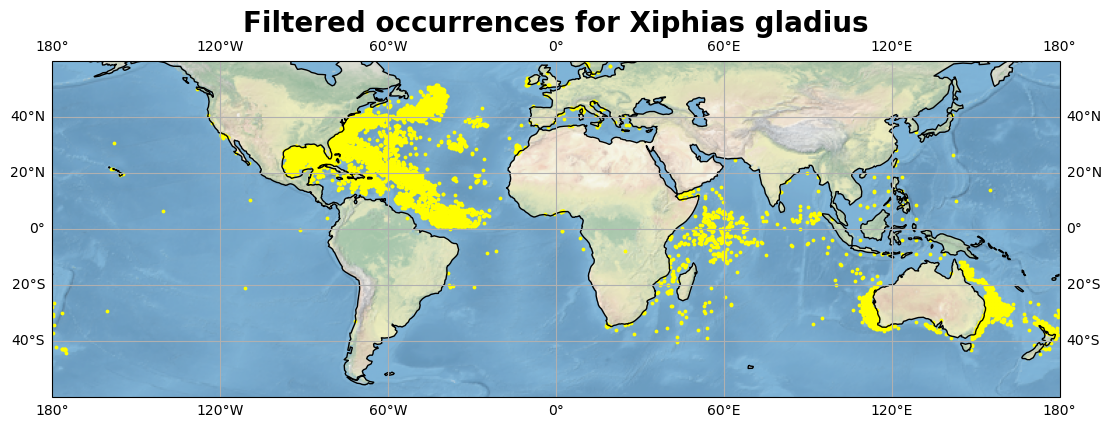

In [4]:
for key in species_occ_dict:
    
    #extract occurrence data for species
    data = species_occ_dict[key]
    spec = data["label"][0]
    spec = spec.replace(" ","_")
    
    lat=data["decimalLatitude"]
    lon=data["decimalLongitude"]
    



    fig = plt.figure(figsize=(13,13))
    ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([-180,180, -60, 60], crs=ccrs.PlateCarree())
    ax.stock_img()

    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    plt.scatter(x=lon,y=lat,color='yellow',s=3, alpha=1, transform = ccrs.PlateCarree())


    spec_t=spec.replace("_"," ") 
    plt.title("Filtered occurrences for %s"%spec_t,fontsize=20,fontweight="bold")
    plt.savefig(file_dir2+'/results/fish/{}/{}_occurrence_map.jpeg'.format(spec,spec),pad_inches=0.0, bbox_inches='tight')
    plt.savefig(file_dir2+'/results/fish/{}/{}_occurrence_map.png'.format(spec,spec),pad_inches=0.0, bbox_inches='tight')


